In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_excel("C:/Users/vedant kathe/Downloads/Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.shape

(10683, 11)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def to_date_and_time(my_column):
    df[my_column]=pd.to_datetime(df[my_column])   

In [10]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    to_date_and_time(i)

In [11]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
df['Journey_day']=df['Date_of_Journey'].dt.day
df['Journey_month']=df['Date_of_Journey'].dt.day
df.drop('Date_of_Journey',inplace=True,axis=1)

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-24 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-24 05:50:00,2021-06-24 13:15:00,7h 25m,2 stops,No info,7662,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-24 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-24 18:05:00,2021-06-24 23:30:00,5h 25m,1 stop,No info,6218,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-24 16:50:00,2021-06-24 21:35:00,4h 45m,1 stop,No info,13302,3,3


In [14]:
def extract_hour(col,df):
    df[col+'_hour']=df[col].dt.hour
def extract_min(col,df):
    df[col+'_min']=df[col].dt.minute
def drop_col(col,df):
    df.drop(col,axis=1,inplace=True)
    

In [15]:
extract_hour('Dep_Time',df)
extract_min('Dep_Time',df)
drop_col('Dep_Time',df)


In [16]:
extract_hour('Arrival_Time',df)
extract_min('Arrival_Time',df)
drop_col('Arrival_Time',df)

In [17]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,3,16,50,21,35


In [18]:
df.head(100)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,IndiGo,Chennai,Kolkata,MAA → CCU,2h 25m,non-stop,No info,3540,21,21,5,15,7,40
96,SpiceJet,Banglore,Delhi,BLR → DEL,2h 40m,non-stop,No check-in baggage included,3257,15,15,5,55,8,35
97,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,In-flight meal not included,6478,6,6,19,50,22,50
98,Jet Airways,Mumbai,Hyderabad,BOM → HYD,1h 25m,non-stop,No info,8040,18,18,7,5,8,30


In [19]:
m='m'
h='h'
for i in df['Duration']:
    if m not in i:
        df['Duration']=df['Duration'].replace(i,i+' 0m')  
    if h not in i:
        df['Duration']=df['Duration'].replace(i,'0h '+i)

In [20]:
m='m'
for i in df['Duration']:
    if m not in i:
        print(i)
        

In [21]:
h='h'
for k in df['Duration']:
    if h not in k:
        print(k)

In [22]:
new_ls=[]
for i in range(len(df['Duration'])):
    ls=df['Duration'].iloc[i].split(' ')
    new_ls.append(ls)
new_ls    

[['2h', '50m'],
 ['7h', '25m'],
 ['19h', '0m'],
 ['5h', '25m'],
 ['4h', '45m'],
 ['2h', '25m'],
 ['15h', '30m'],
 ['21h', '5m'],
 ['25h', '30m'],
 ['7h', '50m'],
 ['13h', '15m'],
 ['2h', '35m'],
 ['2h', '15m'],
 ['12h', '10m'],
 ['2h', '35m'],
 ['26h', '35m'],
 ['4h', '30m'],
 ['22h', '35m'],
 ['23h', '0m'],
 ['20h', '35m'],
 ['5h', '10m'],
 ['15h', '20m'],
 ['2h', '50m'],
 ['2h', '55m'],
 ['13h', '20m'],
 ['15h', '10m'],
 ['5h', '45m'],
 ['5h', '55m'],
 ['2h', '50m'],
 ['2h', '15m'],
 ['2h', '15m'],
 ['13h', '25m'],
 ['2h', '50m'],
 ['22h', '0m'],
 ['5h', '30m'],
 ['10h', '25m'],
 ['5h', '15m'],
 ['2h', '30m'],
 ['6h', '15m'],
 ['11h', '55m'],
 ['11h', '5m'],
 ['8h', '30m'],
 ['22h', '5m'],
 ['2h', '45m'],
 ['12h', '0m'],
 ['2h', '50m'],
 ['2h', '50m'],
 ['2h', '15m'],
 ['16h', '5m'],
 ['19h', '55m'],
 ['3h', '15m'],
 ['25h', '20m'],
 ['2h', '50m'],
 ['3h', '0m'],
 ['2h', '50m'],
 ['16h', '15m'],
 ['15h', '5m'],
 ['2h', '15m'],
 ['6h', '30m'],
 ['25h', '5m'],
 ['12h', '25m'],
 ['27h',

In [23]:
duration_hr=[j[0][:-1] for j in new_ls]
duration_min=[k[1][:-1] for k in new_ls]

In [24]:
df['duration_hr']=duration_hr
df['duration_min']=duration_min

In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,3,16,50,21,35,4,45


In [26]:
df.drop('Duration',inplace=True,axis=1)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,3,16,50,21,35,4,45


In [27]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration_hr          object
duration_min         object
dtype: object

In [28]:
df['duration_hr']=df['duration_hr'].astype(int)
df['duration_min']=df['duration_min'].astype(int)

In [29]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration_hr           int32
duration_min          int32
dtype: object

In [30]:
categorical=[column for column in df.columns if df[column].dtype=='O']
categorical

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Above are the categorical columns in dataset

In [31]:
df.shape

(10682, 15)

In [32]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

Most values in additional info are no info so we can drop this column

In [33]:
df.drop('Additional_Info',inplace=True,axis=1)

In [34]:
df['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [35]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop',0)

In [36]:
df['Total_Stops'].value_counts()

1 stop     5625
0          3491
2 stops    1520
3 stops      45
4 stops       1
Name: Total_Stops, dtype: int64

In [37]:
df['Total_Stops']=df['Total_Stops'].replace(0,'0')

In [38]:
nl=[num[:1] for num in df['Total_Stops']]
nl

['0',
 '2',
 '2',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '2',
 '1',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '2',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '2',
 '0',
 '0',
 '1',
 '1',
 '2',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '1',
 '1',
 '1',
 '1',
 '0',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '2',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '2',
 '2',
 '2',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '0',
 '2',
 '0',
 '1',
 '1',
 '2',
 '2',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0'

In [39]:
df['Total_stops_int']=nl

In [40]:
df['Total_stops_int']=df['Total_stops_int'].astype(int)
df.drop('Total_Stops',axis=1,inplace=True)

In [41]:
df.head()

,Airline,Source,Destination,Route,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Total_stops_int
0,IndiGo,Banglore,New Delhi,BLR → DEL,3897,24,24,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,5,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,6,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,5,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302,3,3,16,50,21,35,4,45,1


In [42]:
air=pd.get_dummies(data=df,columns=['Airline','Source','Destination'],drop_first=True)

In [43]:
air.head()

,Route,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,3897,24,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,7662,5,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,13882,6,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,6218,5,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,13302,3,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [44]:
air['route1']=air['Route'].str.split('→').str[0]
air['route2']=air['Route'].str.split('→').str[1]
air['route3']=air['Route'].str.split('→').str[2]
air['route4']=air['Route'].str.split('→').str[3]
air['route5']=air['Route'].str.split('→').str[4]

In [45]:
air.drop('Route',axis=1,inplace=True)
air.head()

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Total_stops_int,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route1,route2,route3,route4,route5
0,3897,24,24,22,20,1,10,2,50,0,...,0,0,0,0,1,BLR,DEL,NaN,NaN,NaN
1,7662,5,5,5,50,13,15,7,25,2,...,0,0,0,0,0,CCU,IXR,BBI,BLR,NaN
2,13882,6,6,9,25,4,25,19,0,2,...,1,0,0,0,0,DEL,LKO,BOM,COK,NaN
3,6218,5,5,18,5,23,30,5,25,1,...,0,0,0,0,0,CCU,NAG,BLR,NaN,NaN
4,13302,3,3,16,50,21,35,4,45,1,...,0,0,0,0,1,BLR,NAG,DEL,NaN,NaN


In [46]:
lst=['route3','route4','route5']
for nones in lst:
    air[nones].fillna('None',inplace=True)
air.head()    

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Total_stops_int,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route1,route2,route3,route4,route5
0,3897,24,24,22,20,1,10,2,50,0,...,0,0,0,0,1,BLR,DEL,None,None,None
1,7662,5,5,5,50,13,15,7,25,2,...,0,0,0,0,0,CCU,IXR,BBI,BLR,None
2,13882,6,6,9,25,4,25,19,0,2,...,1,0,0,0,0,DEL,LKO,BOM,COK,None
3,6218,5,5,18,5,23,30,5,25,1,...,0,0,0,0,0,CCU,NAG,BLR,None,None
4,13302,3,3,16,50,21,35,4,45,1,...,0,0,0,0,1,BLR,NAG,DEL,None,None


In [47]:
air.isnull().sum()

Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_Time_hour                                0
Dep_Time_min                                 0
Arrival_Time_hour                            0
Arrival_Time_min                             0
duration_hr                                  0
duration_min                                 0
Total_stops_int                              0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [49]:
for route in ['route1','route2','route3','route4','route5']:
    air[route]=encoder.fit_transform(air[route])

In [50]:
air.head()

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Total_stops_int,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route1,route2,route3,route4,route5
0,3897,24,24,22,20,1,10,2,50,0,...,0,0,0,0,1,0,13,29,13,5
1,7662,5,5,5,50,13,15,7,25,2,...,0,0,0,0,0,2,25,1,3,5
2,13882,6,6,9,25,4,25,19,0,2,...,1,0,0,0,0,3,32,4,5,5
3,6218,5,5,18,5,23,30,5,25,1,...,0,0,0,0,0,2,34,3,13,5
4,13302,3,3,16,50,21,35,4,45,1,...,0,0,0,0,1,0,34,8,13,5


In [51]:
pd.set_option('display.max_columns',35)
air.head()

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Total_stops_int,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route1,route2,route3,route4,route5
0,3897,24,24,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,29,13,5
1,7662,5,5,5,50,13,15,7,25,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,25,1,3,5
2,13882,6,6,9,25,4,25,19,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,32,4,5,5
3,6218,5,5,18,5,23,30,5,25,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,34,3,13,5
4,13302,3,3,16,50,21,35,4,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,8,13,5


In [52]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


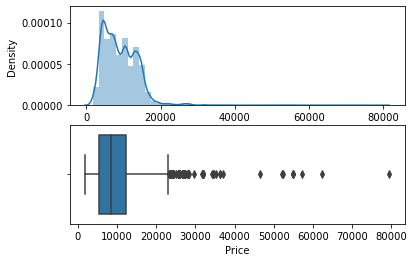

In [53]:
plot(air,'Price')

In [54]:
air['Price']=np.where(air['Price']>40000,air['Price'].median(),air['Price'])

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


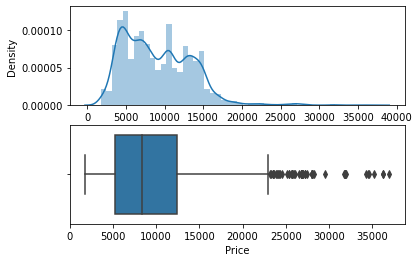

In [55]:
plot(air,'Price')

In [56]:
air.head()

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hr,duration_min,Total_stops_int,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,route1,route2,route3,route4,route5
0,3897.0,24,24,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13,29,13,5
1,7662.0,5,5,5,50,13,15,7,25,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,25,1,3,5
2,13882.0,6,6,9,25,4,25,19,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,32,4,5,5
3,6218.0,5,5,18,5,23,30,5,25,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,34,3,13,5
4,13302.0,3,3,16,50,21,35,4,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,34,8,13,5


In [57]:
X=air.drop('Price',axis=1)
y=air['Price']

In [58]:
from sklearn.feature_selection import mutual_info_classif

In [59]:
mutual_info_classif(X,y)

array([1.07181627, 1.08445328, 1.42341818, 1.21078533, 1.83783618,
       1.52545877, 1.7774111 , 1.09853243, 2.14956501, 0.73785428,
       0.09222232, 0.67899735, 0.91258636, 0.0156293 , 0.57045952,
       0.0114755 , 0.31094963, 0.00874425, 0.22776057, 0.        ,
       0.15426579, 1.53154803, 0.87608948, 0.2940985 , 1.55284266,
       0.40158647, 0.27595527, 0.16274223, 0.38504282, 2.00562082,
       2.8129235 , 2.30032365, 1.45130258, 0.79034988])

In [60]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Journey_day,1.093508
Journey_month,1.056063
Dep_Time_hour,1.413577
Dep_Time_min,1.218711
Arrival_Time_hour,1.830769
Arrival_Time_min,1.545727
duration_hr,1.775996
duration_min,1.084876
Total_stops_int,2.173787
Airline_Air India,0.778734


In [61]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
route2,2.774622
route3,2.300545
Total_stops_int,2.173787
route1,2.028236
Arrival_Time_hour,1.830769
duration_hr,1.775996
Destination_Cochin,1.551268
Arrival_Time_min,1.545727
Source_Delhi,1.498666
route4,1.416450


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [64]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    #if dump==1:
        ##dump your model using pickle so that we will re-use
        #file=open('E:\End-2-end Projects\Flight_Price/model.pkl','wb')
        #pickle.dump(model,file)

In [65]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9010914208357765
predictions are: 
 [ 8528.65        4854.07866667  5216.89833333 ... 14005.925
  9657.34        7068.835     ]


r2 score: 0.7791150468174579
MAE: 1309.0023086815436
MSE: 4188903.8094885936
RMSE: 2046.6811694762312


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


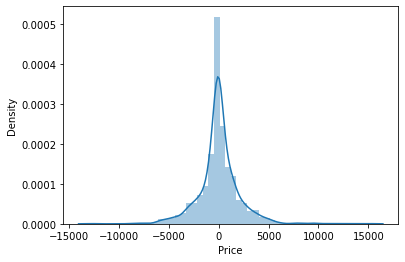

In [66]:
predict(RandomForestRegressor())

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9108385783367245
predictions are: 
 [ 8309.  4804.  5192. ... 13817.  9646.  7171.]


r2 score: 0.7108299707309627
MAE: 1434.7881708150426
MSE: 5483874.839559402
RMSE: 2341.767460607351


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


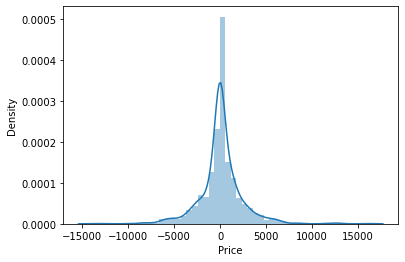

In [68]:
predict(DecisionTreeRegressor())

Training score : 0.6116490447960312
predictions are: 
 [10346.45294152  3441.04678074  6376.38498932 ... 14868.60845574
  9136.99480588  4902.17477914]


r2 score: 0.6155322007732407
MAE: 1946.8391504311728
MSE: 7291119.678377241
RMSE: 2700.2073398865577


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


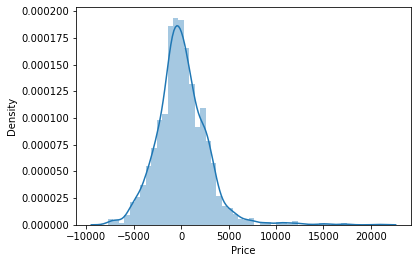

In [69]:
predict(LinearRegression())

Training score : 0.7781217571094059
predictions are: 
 [ 8493.4  5050.8  4940.  ... 13959.8  8551.2  7307.4]


r2 score: 0.6524441110857144
MAE: 1700.1147402901265
MSE: 6591115.266598036
RMSE: 2567.3167445015497


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


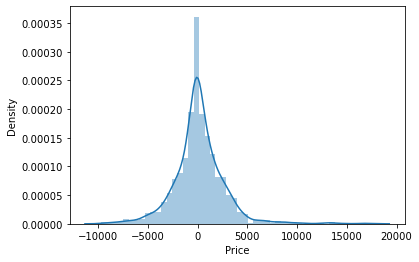

In [70]:
predict(KNeighborsRegressor())

In [72]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

Training score : 0.5491128580781575
predictions are: 
 [10309.71143305  7000.2193159   6209.94353772 ... 19675.90788447
  9202.70500404  5426.33512397]


r2 score: 0.55097780940141
MAE: 2293.633770443098
MSE: 8515341.301627455
RMSE: 2918.1057728649


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


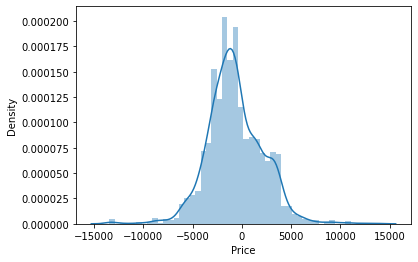

In [73]:
predict(AdaBoostRegressor())

Training score : 0.910838263195276
predictions are: 
 [ 8267.16  4804.    5192.   ... 13817.    9646.    7171.  ]


r2 score: 0.748379505797806
MAE: 1349.2114460592961
MSE: 4771778.391975496
RMSE: 2184.440063717816


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


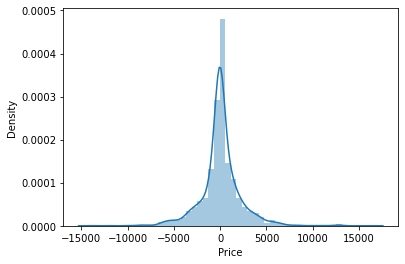

In [74]:
predict(ExtraTreesRegressor())

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [81]:
rand_for=RandomForestRegressor()

In [76]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]


In [78]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [79]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [82]:
rf_random=RandomizedSearchCV(estimator=rand_for,param_distributions=random_grid,cv=3,verbose=5,n_jobs=-1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   38.6s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   56.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=5)

In [84]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [85]:
pred=rf_random.predict(X_test)

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

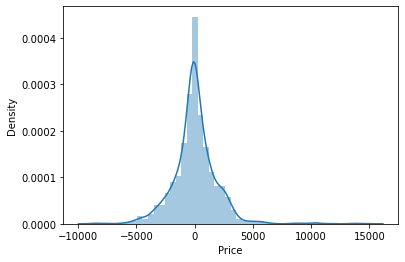

In [86]:
sns.distplot(y_test-pred)

In [88]:
metrics.r2_score(y_test,pred)

0.8108040803589003

In [89]:
import pickle

In [90]:
file=open('C:/Users/vedant kathe/Downloads/rf_random.pkl','wb')
pickle.dump(rf_random,file)

In [92]:
model=open('C:/Users/vedant kathe/Downloads/rf_random.pkl','rb')
pickle.load(model)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=5)

Training score : 0.8548767196927315
predictions are: 
 [10356.11697676  4862.18988211  5239.31619118 ... 14725.80667751
  9434.72934847  6907.84470932]


r2 score: 0.8089797461476231
MAE: 1264.698572847067
MSE: 3622544.0326414322
RMSE: 1903.2981985599188


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


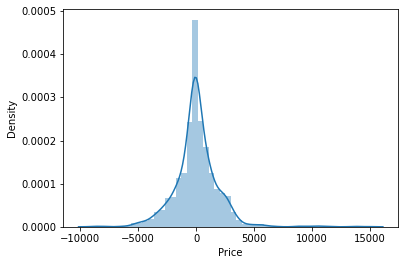

In [95]:
predict(RandomForestRegressor(n_estimators= 540,
 min_samples_split= 15,
 max_features= 'auto',
 max_depth= 13))